# Introduction to Cyclical Learning Rates for training Neural Nets

**Learn what cyclical learning rate policy and how it can improve the training of a neural network.**

(This tutorial assumes that the reader is familiar with the basics of neural networks)

Neural network is no more an uncommon phrase to the Computer Science society or let's say to the society in general. The main reason that makes it so cool is not just the amount of real world problems it is solving, but also the kind of problems it is solving. How can they be so varied? 

Be it in the field of Cognitive Psychology, be it in the domain of Cyber Security, be it in the domain of Health-care (You are not considering Computer Vision, Computer Graphics, Natural Language Processing etc. for the time being. Let's name the more uncommon ones!), almost each and every industry is getting tremendously benefited by the intelligence and automation a neural network has to offer.  

But why? This is question that keeps coming and coming! Well, the answer for this is still under active research because Neural Networks are quite blackbox in nature and its resemblance with a brain makes this question more complex. Anyway, answering that question is not the objective  of this post. 

One thing is for sure! In order to get expected results from a neural network the one thing that has to be ensured is its **Training**. And by now, you already might have discovered _Training a very large_ calls for a tremendous amount of computation power. Without good GPUs, SSDs it is _almost_ impossible to train a _very large_ neural network. Now by _very large_ how much large is meant? Well, large enough to produce good results on an [ImageNet](https://www.image-net.org/) dataset. Because, that is kind of a benchmark. 

But this very idea of training very large neural networks got completely revolutionized when a team of talented researchers from [Fast.ai](http://www.fast.ai) was able to beat Google's model achieving an accuracy of 93% accuracy in just 18 minutes that too in just $40.

Sounds interesting? Read on!

But what were the key ingredients behind this to occur? State-of-the-art GPUs? State-of-the-art TPUS? State-of-the-art SSDs?

Absolutely not. The team's configuration was quite simple as the cost is only $40. The key ingredient was the use of state-of-the-art algorithms to train the neural network. [In this blog](http://www.fast.ai/2018/08/10/fastai-diu-imagenet/), the great researcher and educator [Jeremy Howard](https://twitter.com/jeremyphowardref_src=twsrc%5Egoogle%7Ctwcamp%5Eserp%7Ctwgr%5Eauthor) has discussed the main reasons of this big win. 

This is classic example where the power of costly hardwares gets lost to the power of powerful algorithms. In this post, you are going to uncover the details of one such technique that can ensure a neural network is trained with the best possible learning rate. This technique is known as **Cyclical Learning Rate**. This was proposed way back in 2015 by [Leslie N. Smith](https://mlconf.com/interview-with-leslie-n-smith-phd-senior-research-scientist-at-the-us-naval-research-laboratory-by-reshama-shaikh-program-committee-member/). You can check the original paper [here](https://arxiv.org/pdf/1506.01186).

But why are you going to cover only learning rate when there are other important hyperparameters like dropout rate, activation functions? Because, learning rate is the most important one among them. Just that!

In this post, you are going to study: 
- Quickly revisit why learning rates are needed? 
- What are the techniques available for finding the most suitable learning rate for a neural network?
- Introduction to cyclical learning rates
- Inner mechanics of cyclical learning rates
- A case study in Python

## Why are learning rates needed?

Let's quickly revisit the main purpose of using learning rates for training a neural net. 

Learning rate is a [hyperparameter](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning) that controls how much you are adjusting the weights of our network with respect the loss gradient. What? Why gradients are coming in the picture? Because, you are in your way to optimize a neural network you have just created with [**gradient descent**](https://www.analyticsvidhya.com/blog/2017/03/introduction-to-gradient-descent-algorithm-along-its-variants/). Now, essentially the  goal of gradient descent is to find the minima of the loss function your neural network is trying to optimize. Take a look at the following image [taken from Andrew Ng's Deep Learning course on Coursera]:

<img src = "https://cdn-images-1.medium.com/max/800/0*00BrbBeDrFOjocpK.">

The term in the rectangle is the update rule with which the network starts to learn its parameter $\theta$1 where $\alpha$ is the learning rate. 

In the first curve, the lower most point is the minima of the loss function. Suppose, in the current iteration, your network is in near the left topmost point. Now, in order to converge to the lowest point you take partial derivatives of the loss function $J(\theta1)$ and compute the gradients for getting the directions towards arriving at that lowest point. 

In order to arrive a bit faster at that point, you add another term $\alpha$ which is the learning rate. The lower the value, the slower you travel along the downward slope. While this might be a good idea (using a low learning rate) in terms of making sure that you do not miss any local minima, it could also mean that you’ll be taking a long time to converge — especially if you get stuck on a plateau region. 

That was a quick recap of the objectives of learning rates in simple words. Now you will study the techniques of choosing a good learning rate for your neural network.  

<img src = "https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png"></img>
**[Source: Jeremy Jordan's blog](https://www.jeremyjordan.me/nn-learning-rate/)**

## What are the techniques available for finding the most suitable learning rate for a neural network?

There is no fixed learning rate for a neural network. It depends on the kind of problem you are working on, the kind of data you are feeding to your network and most importantly the structure of the network which varies from problem to problem. Handpicking a learning rate is a very painful task because in case you are training a large network you can incur huge amount of costs for this. And it is very time consuming as well. 

Should you run standard hyperparameter optimization methods like Grid Search or Random Search? 
- That is again horrible for large network. But why you keep coming to large networks? Because, almost any real world complex problem will need a large neural network.

Still now, the most common practice is to set the learning rate to a constant value and decrease it by an order of magnitude once the accuracy has plateaued.

Therefore, there is a clear need of a systematic technique which can simplify the process of choosing a good learning rate for a particular neural network. Not only this, but also, there has to be sufficient amount of reasons which would support that approach as to why it is trust-worthy. 

It seems Cyclical Learning Rates (CLR) appeared just in time. 

## Introduction to cyclical learning rates:

The objectives of cyclical learning rate (CLR) are two-fold:
- CLR gives  an approach for setting the global learning rates for training neural networks that eliminates the need to perform tons experiments to find the best values with no additional computation.
- CLR provides a good learning rate range (LR range) for an experiment by introducing the concept of **LR Range Test**. 

You will study this section merely for building your intuition of how CLR works. In the next section, you will dive into more details. In the previous sections, you briefly understood why learning rates are anyway used. Let's again recall it.  

An ideal learning rate would be the one which performs a steep decrease in the network's loss. Here comes the wizardry of CLR.  The original CLR paper talks about an experiment wherein you can observe the behavior of learning rate with respect to the loss. The experiment is very easy to visualize where you gradually increase the learning rate after each _mini-batch_, recording the loss at each increment. This gradual increase can be either be linear or be exponential. And yes, this is essentially the _LR Range Test_. 

After performing the experiment Leslie showed us, for too low learning rates, the loss may decrease, but at a very shallow rate. When entering the optimal learning rate zone, you'll observe a quick drop in the loss function. If you further increase the learning rate then it can cause parameter loss in the network which in turn might lead to loss increase. So, from this experiment it is clear that you are interested in a steep decrease of the loss function and for that you can analyze the gradients of the loss function at different stages of the training. 

<img src = "https://cdn-images-1.medium.com/freeze/max/1000/1*VAmbyfpR0_-gP0oIla0Vjw.png?q=20"></img>

**[Source: Jeremy Jordan's blog](https://www.jeremyjordan.me/nn-learning-rate/)**

So, from the above graph, you can easily spot three different phases where the loss does not change much, then comes a times a steep decrease happen and then again the loss starts to increase again slowly. 

Can you see the steepest decrease among all the other decreases? Yes, essentially you want to end up in that range and CLR will give you a disciplined approach in finding it. Getting the feel? Let's find out more. 

## Delving more with CLR:

The above observation gives you an important point to consider: 

The idea of letting the learning rate vary within a range of values rather than adopting a linearly or exponentially decreasing value. You can do this by setting a definite range of learning rates and then instead going for any linear or exponential variation, you cyclically vary the learning rates from the defined range. Leslie considered the following function forms in order to cyclically vary the learning rate: 

- Triangular window (linear)
- Welch window (parabolic) 
- Hann window (sinusoidal) 

But all of the forms produced equivalent results and in the original paper the idea is only presented with triangular from 
(linearly increasing then linearly decreasing) because of its simplicity. This policy is referred to as _triangular learning rate policy_ as well. Refer to the following image in order to think about the triangular form visually:

<img src = "https://image.ibb.co/nqT4PK/Capture.jpg">
**Source: The original CLR paper mentioned in the beginning of the tutorial**

In addition to the triangular learning rate policy, following policies were also presented in the paper:

1. **triangular2** -  It is as same as the triangular policy except the learning rate difference is made half at the end
of each cycle. This means the learning rate difference drops after each cycle.
2. **exp range** - In this case, the learning rate varies between the minimum and maximum boundaries and each boundary value declines by an exponential factor. 

One question you might have quickly asked yourself at this point of time is - How can one estimate reasonable minimum and
maximum boundary values? Remember the LR Range Test that you studied just a moment ago? Now, you should be able to find its relevance better. Let's do quick case study now to see how CLR can smoothen your experiments. 

(To the very end of this tutorial, you will discover some more advancements over CLR that have been proposed recently, but by now, you already have understood the worth of CLR. )

## A case study of CLR in Python:

You will be doing this using the classic MNIST dataset which is probably the most popular dataset for getting started into Computer Vision and Deep Learning. Check out [this blog](http://colah.github.io/posts/2014-10-Visualizing-MNIST/) if you want learning about MNIST in a very detailed manner. You will use `keras` extensively for all purposes of the experiment. `keras` provides a built-in version of the dataset. You will start off your experiment by importing that and by performing some basic EDA. 

In [1]:
from keras.datasets import mnist

Using TensorFlow backend.


You have imported the dataset successfully. Now, you will do some basic visualizations of the dataset. 

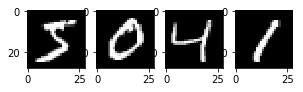

In [14]:
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Plot 4 images as gray scale
plt.subplot(152)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(153)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(154)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(155)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# Show the plot
plt.show()

That's great! You will straight proceed towards building a simple multi-layer neural network. But before that, you will do some basic data preprocessing. 

In [15]:
# Flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

What did you do?

The images in the dataset are of 28*28 dimensions which is difficult to accommodate in a simple multi layer neural network. That is why, you converted the images to a single dimension where each image contains 784 pixel data using the `reshape()` function. 

The pixel values in the images are in the range of 0 - 255. A good idea will be to decrease this even further by normalizing the range to 0 - 1.

In [16]:
X_train = X_train / 255
X_test = X_test / 255

The output variable is an integer from 0 to 9. This is a multi-class classification problem. You will perform one-hot encoding of the class labels for getting a vector of class integers into a binary matrix. You will do this to do a “binarization” of the category and so that you can include it as a feature to train the neural network.

You can easily do this using the built-in `np_utils.to_categorical()` helper function in `keras`.

In [17]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

Now you will define the structure of your network. You will use a simple fully-connected network for this purpose. In `keras` this is typically three-step process:

In [18]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Create model
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Let's see what all you did in the above code. You are constructing the network in a sequential manner (which is a linear stack of layers). Then you started to add the layer in your network where in the first layer you added the neurons (which is equal to the number of pixels in an image i.e. 784) and you specified the input dimension of the images which is in this case as same as the number of the pixels. You instructed your network to get itself initialized  with weights from a _normal_ distribution. Finally, you supplied `relu` as the activation function for the first layer. 

In the final layer, you kept the number of the neurons to 10 (which is the number of class labels) and you provided the activation to be `softmax` to turn the outputs into probability-like values and allow one class of the 10 to be selected as the model’s output prediction.

You compiled the model as to decide the optimization method of the model (which is `ADAM` in this case) and the which kind loss this method will optimize (which is `categorical_loss` in this case).

Now you will train the model and record the time it took to get trained. You will also test its performance. 

In [19]:
import timeit

# For fixing the reproducibility
from numpy.random import seed
seed(1)

# Fit the model
startTime = timeit.default_timer()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
elapsedTime = timeit.default_timer() - startTime
print("Time taken for the Network to train : ",elapsedTime)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 10s - loss: 0.2774 - acc: 0.9207 - val_loss: 0.1362 - val_acc: 0.9610
Epoch 2/10
 - 8s - loss: 0.1113 - acc: 0.9675 - val_loss: 0.0951 - val_acc: 0.9720
Epoch 3/10
 - 8s - loss: 0.0712 - acc: 0.9793 - val_loss: 0.0802 - val_acc: 0.9750
Epoch 4/10
 - 8s - loss: 0.0503 - acc: 0.9857 - val_loss: 0.0687 - val_acc: 0.9788
Epoch 5/10
 - 8s - loss: 0.0360 - acc: 0.9897 - val_loss: 0.0632 - val_acc: 0.9797
Epoch 6/10
 - 8s - loss: 0.0267 - acc: 0.9928 - val_loss: 0.0643 - val_acc: 0.9784
Epoch 7/10
 - 8s - loss: 0.0201 - acc: 0.9951 - val_loss: 0.0633 - val_acc: 0.9802
Epoch 8/10
 - 8s - loss: 0.0150 - acc: 0.9962 - val_loss: 0.0613 - val_acc: 0.9808
Epoch 9/10
 - 8s - loss: 0.0108 - acc: 0.9978 - val_loss: 0.0625 - val_acc: 0.9806
Epoch 10/10
 - 8s - loss: 0.0076 - acc: 0.9988 - val_loss: 0.0612 - val_acc: 0.9809
Time taken for the Network to train :  86.4216202873591
Baseline Error: 1.91%


This simple model did actually quite well achieving an error rate of just 1.91% in  approximate 87 seconds. Now you will see the power of CLR. You will start off by cloning the [`keras` implementation of CLR](https://github.com/bckenstler/CLR) from Github. 

After a successful clone, you should have the following files into your local working directory. 

<img src = "https://image.ibb.co/nBjxBz/Capture.jpg">

The CLR policy is implemented as a [`keras callback`](https://keras.io/callbacks/) here. 

In [22]:
from keras.callbacks import *
from clr_callback import *
from keras.optimizers import Adam

# You are using the triangular learning rate policy and 
#  base_lr (initial learning rate which is the lower boundary in the cycle) is 0.1 
clr_triangular = CyclicLR(mode='triangular')
model.compile(optimizer=Adam(0.1), loss='categorical_crossentropy', metrics=['accuracy'])

You will pass on this `clr_triangular` to the `callbacks` parameter while fitting the network. You will use a larger `batch_size` this time. You will record the time as well. 

In [23]:
startTime = timeit.default_timer()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=2000,callbacks=[clr_triangular], verbose=2)
elapsedTime = timeit.default_timer() - startTime
print("Time taken for the Network to train : ",elapsedTime)

# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 - 4s - loss: 0.0046 - acc: 0.9996 - val_loss: 0.0571 - val_acc: 0.9831
Epoch 2/10
 - 4s - loss: 0.0030 - acc: 0.9998 - val_loss: 0.0575 - val_acc: 0.9829
Epoch 3/10
 - 4s - loss: 0.0023 - acc: 0.9999 - val_loss: 0.0594 - val_acc: 0.9827
Epoch 4/10
 - 4s - loss: 0.0018 - acc: 0.9999 - val_loss: 0.0589 - val_acc: 0.9835
Epoch 5/10
 - 4s - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0595 - val_acc: 0.9831
Epoch 6/10
 - 4s - loss: 0.0011 - acc: 1.0000 - val_loss: 0.0600 - val_acc: 0.9836
Epoch 7/10
 - 4s - loss: 0.0010 - acc: 1.0000 - val_loss: 0.0612 - val_acc: 0.9832
Epoch 8/10
 - 4s - loss: 8.2190e-04 - acc: 1.0000 - val_loss: 0.0621 - val_acc: 0.9829
Epoch 9/10
 - 4s - loss: 6.6182e-04 - acc: 1.0000 - val_loss: 0.0624 - val_acc: 0.9836
Epoch 10/10
 - 4s - loss: 5.7177e-04 - acc: 1.0000 - val_loss: 0.0635 - val_acc: 0.9836
Time taken for the Network to train :  43.23223609056981
Baseline Error: 1.64%


Can you spot the advantage? This is something really amazing to see! You model took only 44 seconds to get trained and yielded even a better error rate than the previous one. Very good!

## Congratulations!

You have made it to the end. In this tutorial, you studied a very crucial problem of finding a suitable learning rate and how CLR completely changed the way you used to approach this problem. You studied CLR covering a good amount details and did a small experiments as to see how CLR can produce some very good results in a less time. 

Now what next?
The two byproducts that have come out from CLR are:
- [Stochastic Gradient Descent with Warm Restarts](https://arxiv.org/abs/1608.03983)also known as **Cosine Annealing**
- [Differential Learning Rates](https://blog.slavv.com/differential-learning-rates-59eff5209a4f)

Study the above two approaches in order to get even more insights in this topic. Also, after CLR Leslie published a paper titled [A disciplined approach to neural network hyper-parameters: Part 1 -- learning rate, batch size, momentum, and weight decay](https://arxiv.org/abs/1803.09820) which revisits CLR and discusses efficient methods for choosing the values of other important hyperparameters of a neural network. Leslie also revisited one of his techniques called **Super Convergence** in this paper. This paper is a must read for anyone, who thinks, eats and sleeps neural networks.

Limited applicability is one of the major shortcomings of CLR. It has to be made full-proof before one can use it in production levels. 

If you are interested in knowing more about Neural Networks, you should definitely take DataCamp's [Deep Learning in Python](https://www.datacamp.com/courses/deep-learning-in-python) course which is very well designed and is taught by Dan Becker (Head of Kaggle Learn)